In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

In [2]:
A = np.array([[0.9, 0], [0, 1.1]])
B = np.array([[0], [1]])
K = np.array([[0, 0.3]])
CL = A - np.dot(B, K)
print(CL)
# u = -k*x

[[0.9 0. ]
 [0.  0.8]]


## Generate Data

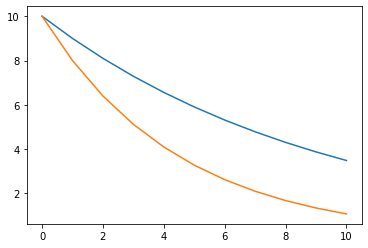

In [3]:
## initial condition
number_of_time_steps = 10

x = np.zeros([2, number_of_time_steps + 1])
u = np.zeros([number_of_time_steps])
x[:, 0] = np.array([[10, 10]])
for time_step in range(number_of_time_steps):
    u[time_step] = np.dot(-K, x[:, time_step])
    calc_x = np.dot(A, x[:, time_step].reshape((2, 1))) + np.dot(B, u[time_step])
    x[:, time_step+1] = calc_x.reshape((1, 2))
    
plt.plot(range(number_of_time_steps+1), np.matrix.transpose(x))
plt.show()

## testing the naive DMD

In [4]:
X = x[:, 0:-1]
X2 = x[:, 1:]
Anaive = np.dot(X2, linalg.pinv(X))
print(Anaive)

[[ 9.00000000e-01  0.00000000e+00]
 [-5.55111512e-17  8.00000000e-01]]


## correct DMDC model

In [5]:
upsilon = u
Acorrect = np.dot(X2 - np.dot(B, u.reshape(1, 10)), linalg.pinv(X))
Acorrect

array([[ 9.00000000e-01,  0.00000000e+00],
       [-2.22044605e-16,  1.10000000e+00]])